In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


from recommender.utils.data import (
    filter_transactions,
    filter_nan_age
)

from recommender.recall import (
    ContentBased,
    Item2VecModel,
    popularity_recall,
    postal_code_recall,
    product_code_recall,
    bought_together_recall,
    user_collaborative_recall,
    age_group_recall
)

from recommender.utils.evaluate import (
    compute_metrics,
    compare_recommendations,
    visualize_compare_recommendations
)

In [12]:
all_user_mean = pd.read_csv("./results/all_user_mean.csv", index_col=0)
all_user_std = pd.read_csv("./results/all_user_std.csv", index_col=0)

few_purch_user_mean = pd.read_csv("./results/few_purch_user_mean.csv", index_col=0)
few_purch_user_std = pd.read_csv("./results/few_purch_user_std.csv", index_col=0)

loyal_user_mean = pd.read_csv("./results/loyal_user_mean.csv", index_col=0)
loyal_user_std = pd.read_csv("./results/loyal_user_std.csv", index_col=0)

new_user_mean = pd.read_csv("./results/new_user_mean.csv", index_col=0)
new_user_std = pd.read_csv("./results/new_user_std.csv", index_col=0)

regular_user_mean = pd.read_csv("./results/regular_user_mean.csv", index_col=0)
regular_user_std = pd.read_csv("./results/regular_user_std.csv", index_col=0)

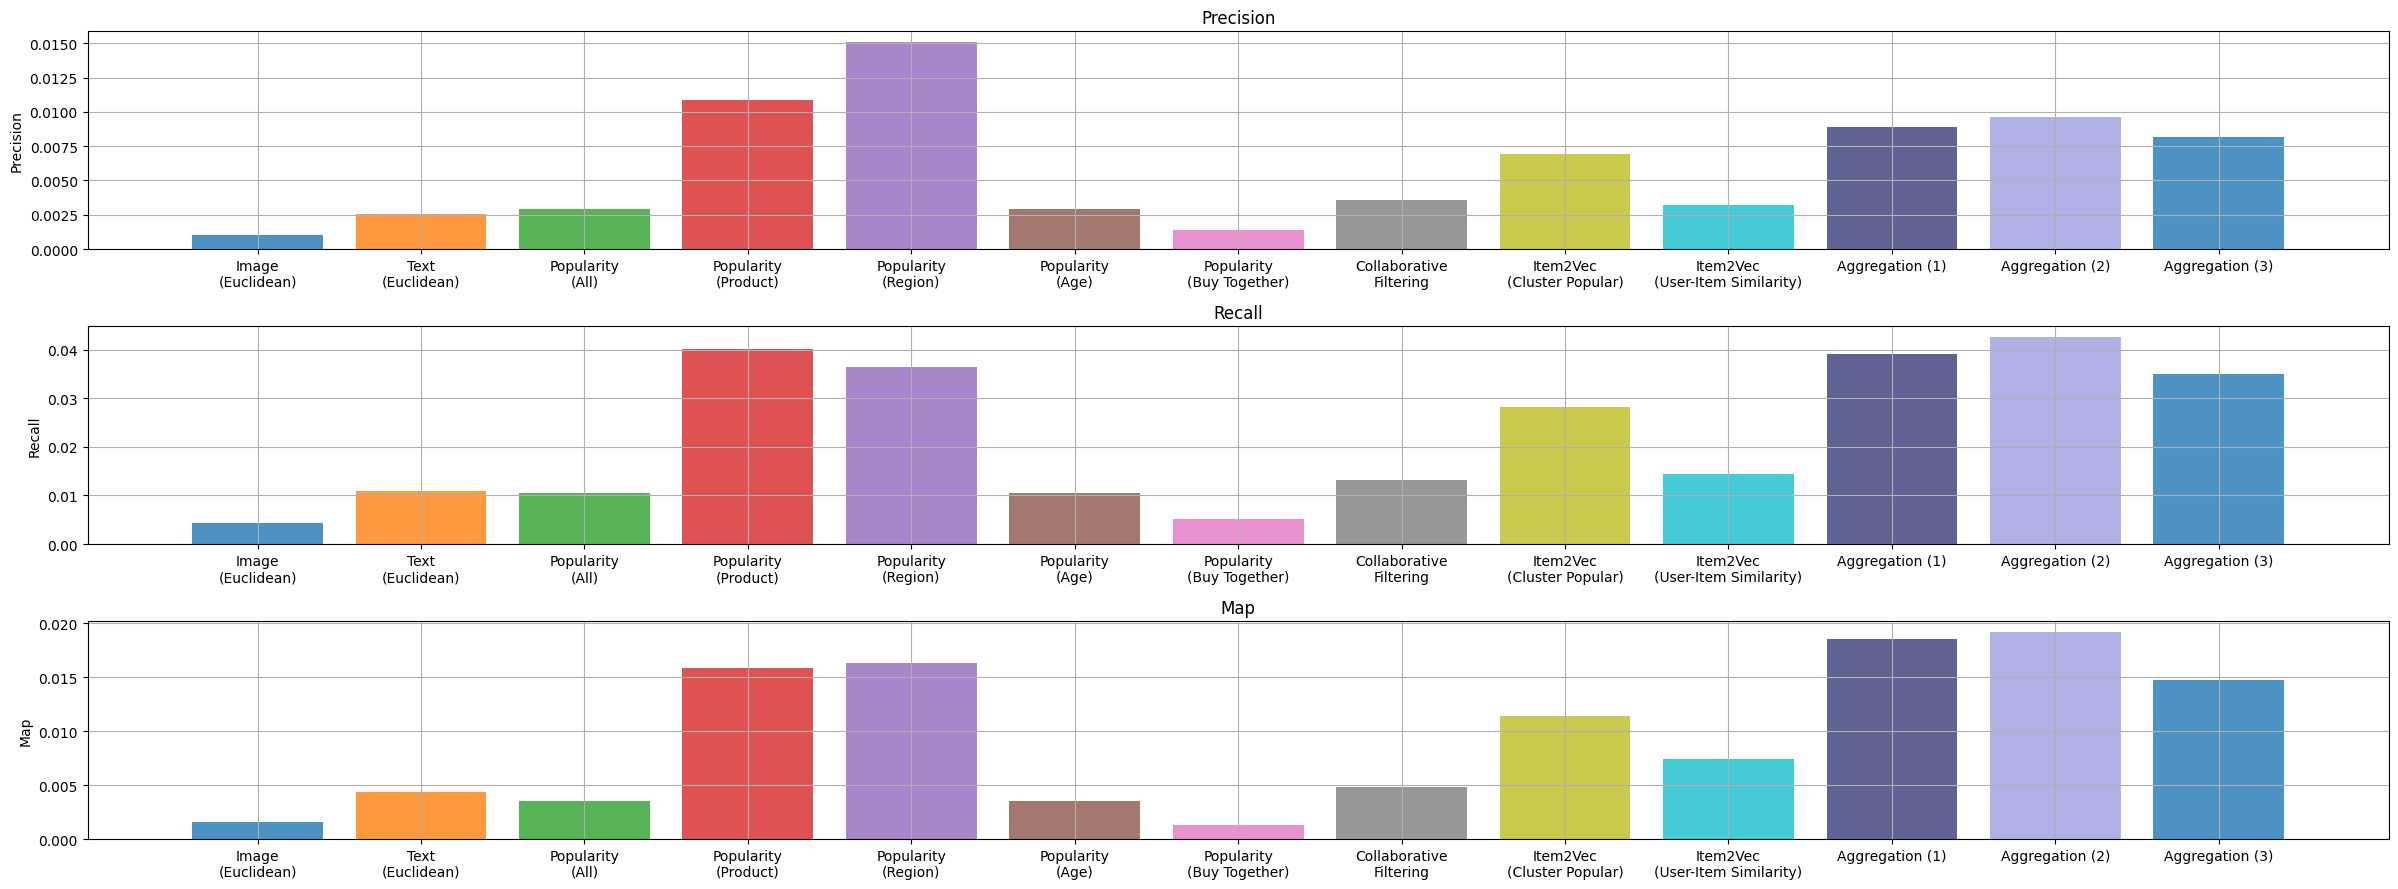

In [13]:
visualize_compare_recommendations(all_user_mean.transpose().to_dict(), metrics=['precision', 'recall', 'map'])

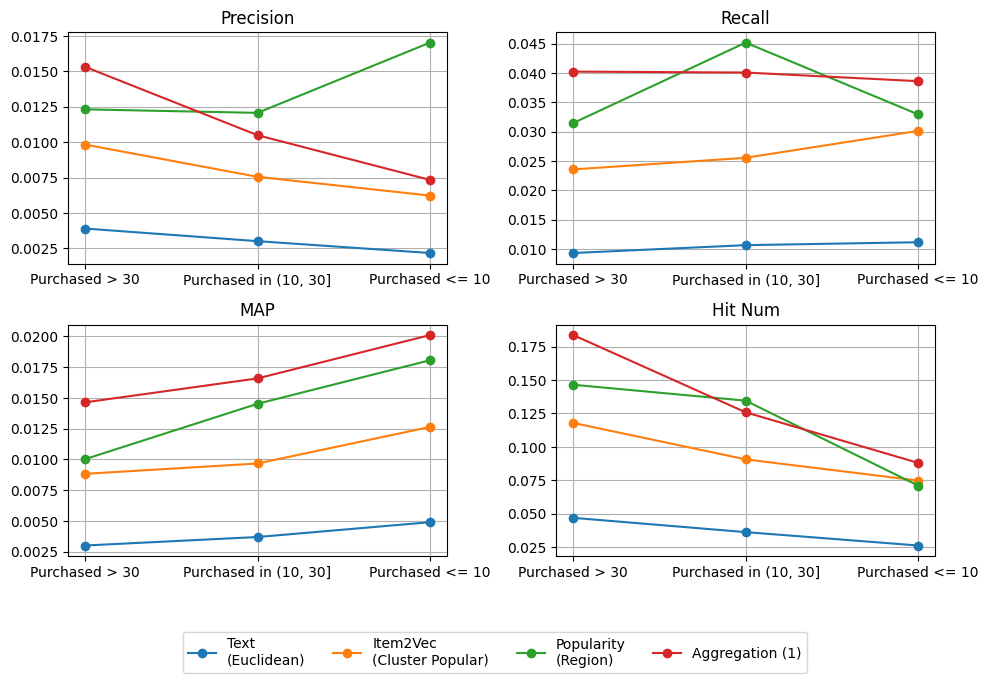

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the rows and dataframes
rows_to_plot = [
    "Text\n(Euclidean)",
    "Item2Vec\n(Cluster Popular)",
    "Popularity\n(Region)",
    "Aggregation (1)"
]
dfs = [loyal_user_mean, regular_user_mean, few_purch_user_mean]
df_names = ['Purchased > 30', 'Purchased in (10, 30]', 'Purchased <= 10']  # More readable names for the plot

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

# Titles for subplots
metrics = ['precision', 'recall', 'map', 'hit_num']
titles = ['Precision', 'Recall', 'MAP', 'Hit Num']

# Plot data
for i, metric in enumerate(metrics):
    for row in rows_to_plot:
        values = [df.loc[row, metric] for df in dfs]  # Collect metric across all dataframes
        axes[i].plot(df_names, values, marker='o', label=row)
    axes[i].set_title(titles[i])
    axes[i].set_xticks(np.arange(len(df_names)))
    axes[i].set_xticklabels(df_names)
    axes[i].grid(True)
    
# Adding a single legend for the whole figure below the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.0, 1, 1])

# Show plot
plt.show()


In [ ]:
visualize_compare_recommendations(
    new_user_mean.transpose().to_dict(),
    metrics=['precision', 'recall', 'map'],
    fig_width=3,
    vertical=False
)